In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idr import connection
c = connection()
im = c.getObject('Image', 8098320)
imsz = [getattr(im, 'getSize' + d)() for d in 'XYZCT']
seg = c.getObject('Image', 8098321)
segsz = [getattr(seg, 'getSize' + d)() for d in 'XYZCT']
segp = seg.getPrimaryPixels()
print(im.name, imsz)
print(seg.name, segsz)

Connected to IDR ...
(u'130520_Neural_Rosettes.tif', [1282L, 838L, 36L, 3L, 1L])
(u'130520_Neural_Rosettes_Manual.tif', [1282L, 838L, 36L, 1L, 1L])


In [2]:
ps = np.dstack(list(segp.getPlanes((z, c, t)
                                   for z in range(seg.getSizeZ())
                                   for c in range(seg.getSizeC())
                                   for t in range(seg.getSizeT()))))
unique_values = np.unique(ps)
print("unique min:{} max:{} len:{}".format(
    unique_values.min(), unique_values.max(), len(unique_values)))
print(unique_values)

unique min:0.0 max:482.0 len:471
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 114. 115. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141.
 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155.
 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183.
 184. 185. 186. 187. 188. 189. 190. 191. 192

`130520_Neural_Rosettes_Manual.tif` has 470 non-zero unique values, which matches the 470 feature rows in `idr0000-experimentA_features.tsv`.

The range of foreground values is `[1, 482]` with some missing indices, so it is not possible to use the label from `130520_Neural_Rosettes_Manual.tif` as a direct index into `idr0000-experimentA_features.tsv`.

The best assumption is to reindex the label values to be consecutive.

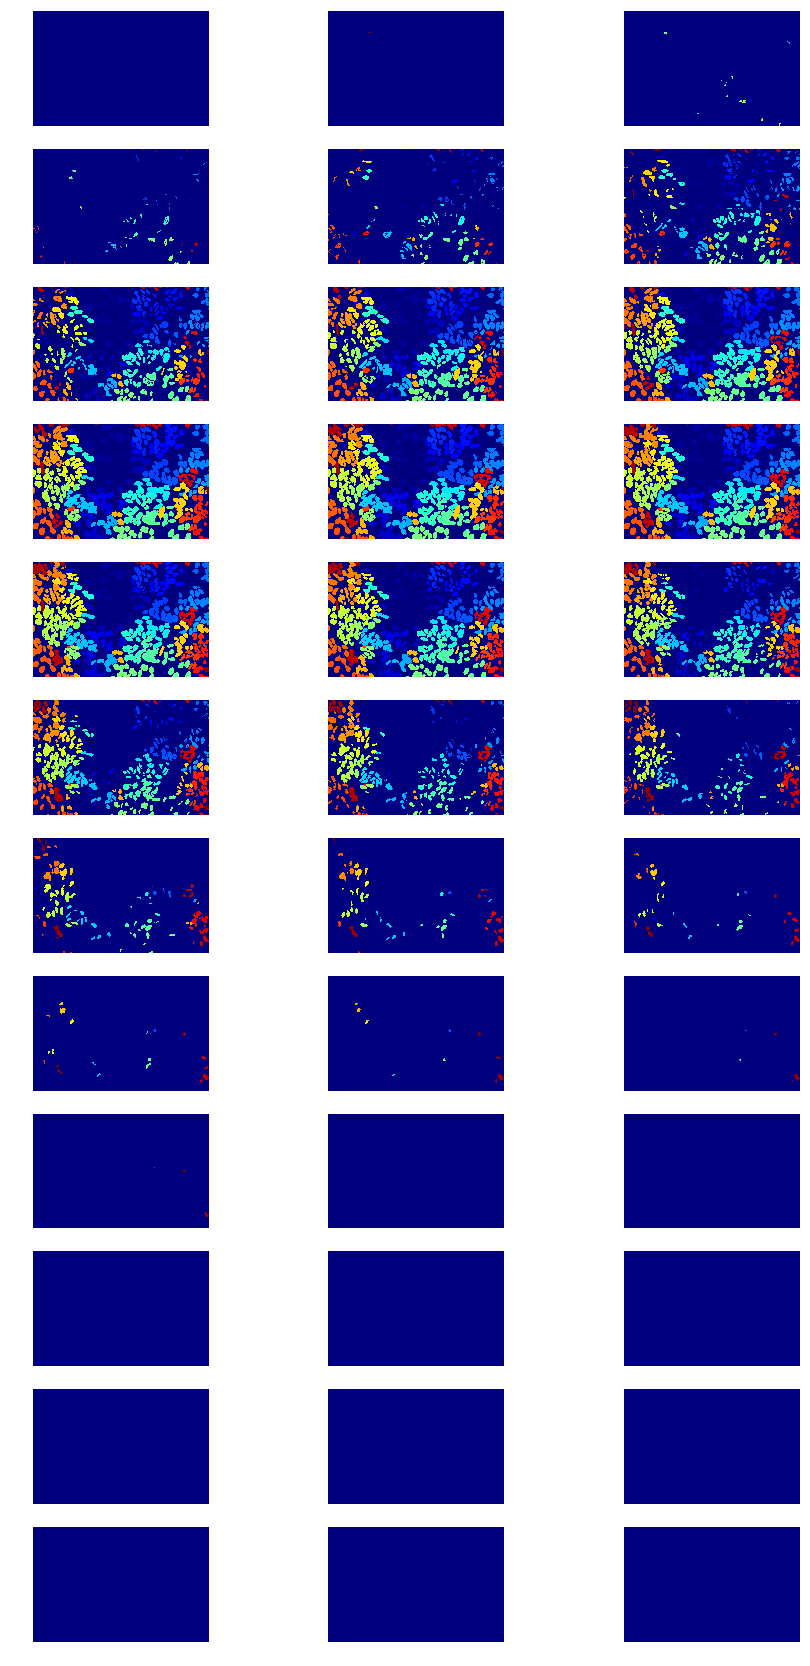

In [3]:
fig, axes = plt.subplots(12, 3, sharex='all', sharey='all', figsize=(15,30))
axes = axes.flatten()
for z in range(ps.shape[2]):
    ax = axes[z]
    ax.imshow(ps[:, :, z], cmap='jet')
    ax.axis('off')